In [1]:
# Importar e instalar dependencias

# Librerías para rocesamiento de datos y algebra lineal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Descarga de archivos de drive
!pip install gdown

In [8]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import LabelEncoder

import joblib

In [4]:

# Carga el dataset usando pandas
sd = pd.read_csv('/content/Fintech_user_limpios.csv')

# Verificamos las primeras filas
sd.head()


,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,1,0,21,R,577.0,48,4,52,45,0,...,0,0,0,0,Pisces,0,0,56.0,1.87,0
1,4,0,35,R,566.0,15,0,73,15,0,...,0,0,0,0,na,0,0,49.0,1.63,0
2,8,1,31,na,519.0,0,0,0,0,0,...,0,0,0,0,Virgo,0,0,18.0,0.60,1
3,9,0,26,na,538.8,0,0,30,0,0,...,0,0,0,0,Sagittarius,0,0,23.0,0.77,0
4,10,0,33,R,558.0,0,0,76,0,0,...,0,0,0,0,Leo,1,0,45.0,1.50,1


In [17]:
# Drop columns that won't be used for prediction
data = sd.drop(['user', 'zodiac_sign', 'waiting_4_loan', 'registered_phones'], axis=1)

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24741 entries, 0 to 24740
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   churn                    24741 non-null  int64  
 1   age                      24741 non-null  int64  
 2   housing                  24741 non-null  object 
 3   credit_score             24741 non-null  float64
 4   deposits                 24741 non-null  int64  
 5   withdrawal               24741 non-null  int64  
 6   purchases_partners       24741 non-null  int64  
 7   purchases                24741 non-null  int64  
 8   cc_taken                 24741 non-null  int64  
 9   cc_recommended           24741 non-null  int64  
 10  cc_disliked              24741 non-null  int64  
 11  cc_liked                 24741 non-null  int64  
 12  cc_application_begin     24741 non-null  int64  
 13  app_downloaded           24741 non-null  int64  
 14  web_user              

In [14]:
# Listado de columnas categóricas a codificar
columns_to_encode = [
    'housing', 'payment_type'
]

# Aplicar Label Encoding a las variables categóricas
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Definir features (X) y target (y)
X = data.drop('churn', axis=1)
y = data['churn']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Entrenar modelo Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# Evaluar el modelo
train_score = rf_model.score(X_train, y_train)
test_score = rf_model.score(X_test, y_test)

print(f"Accuracy en entrenamiento: {train_score:.4f}")
print(f"Accuracy en test: {test_score:.4f}")

Accuracy en entrenamiento: 0.9999
Accuracy en test: 0.7224


Confusion Matrix:
[[2173  510]
 [ 864 1402]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.81      0.76      2683
           1       0.73      0.62      0.67      2266

    accuracy                           0.72      4949
   macro avg       0.72      0.71      0.72      4949
weighted avg       0.72      0.72      0.72      4949



/tmp/ipython-input-2310062200.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


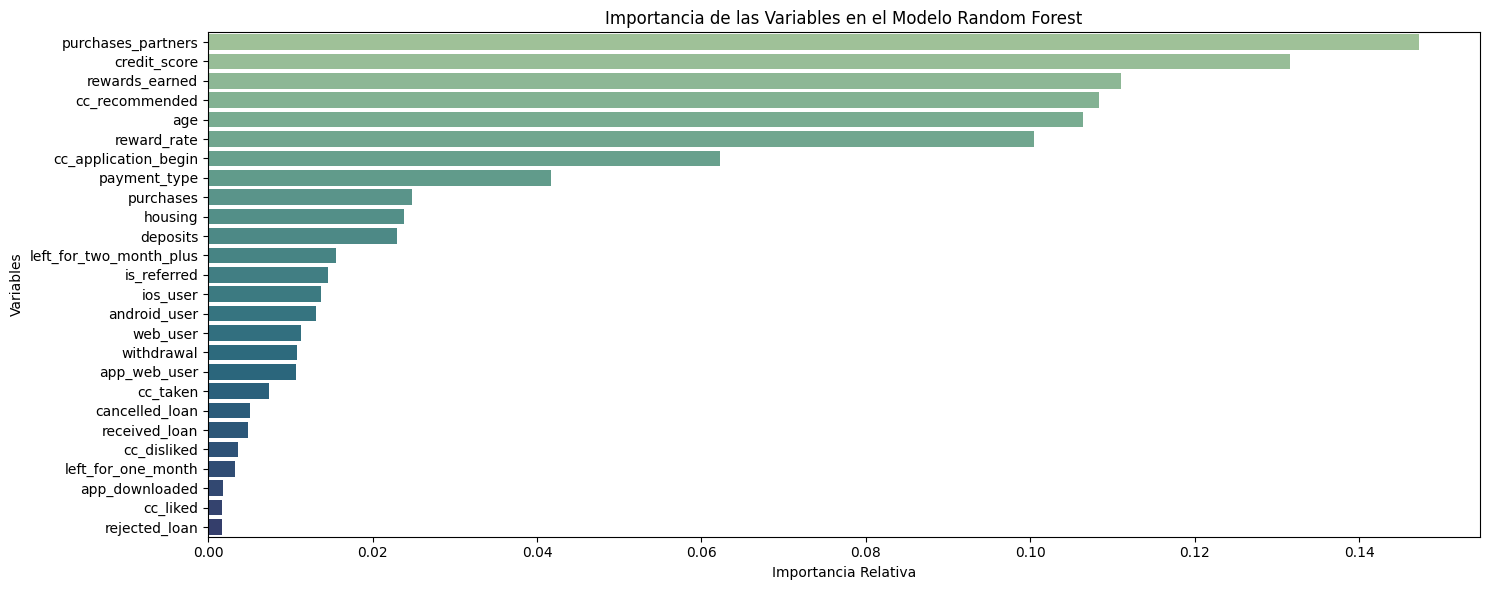

In [15]:
# Inicializar el modelo Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# ============================
# 2️⃣ Evaluar el modelo
# ============================

# Predicciones
y_pred = rf_model.predict(X_test)

# Métricas de evaluación
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ============================
# 3️⃣ Importancia de variables (Feature Importance)
# ============================

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Gráfico
plt.figure(figsize=(15, 6))
sns.barplot(
    x=importances[indices],
    y=X.columns[indices],
    palette="crest"
)
plt.title('Importancia de las Variables en el Modelo Random Forest')
plt.xlabel('Importancia Relativa')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()
